In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loan = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Missing values sees to be present in one of the columns. Let's see if there are in other columns as well.

In [5]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


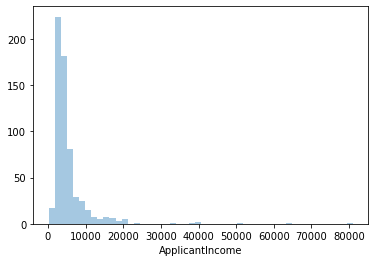

In [6]:
sns.distplot(loan['ApplicantIncome'],kde=False)

It is skewed and we can notice quite a few outliers. Let's check again if there are any missing values.

In [14]:
loan.ApplicantIncome.isnull().sum()

0

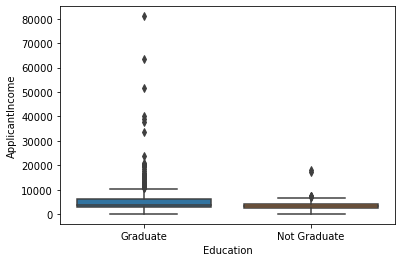

In [16]:
#People with better education should normally have a higher income, we can check that by plotting the education level against the income.

sns.boxplot(x='Education',y='ApplicantIncome',data=loan)

The distributions are quite similar but we can see that the graduates have more outliers which means that the people with huge income are most likely well educated.

In [18]:
#turn loan status into binary 

loan['Loan_Status']=loan['Loan_Status'].apply(lambda x: 0 if x=="N" else 1 )
#calculate the mean
loan.groupby('Credit_History').mean()['Loan_Status']

Credit_History
0.0    0.078652
1.0    0.795789
Name: Loan_Status, dtype: float64

People with a credit history a way more likely to pay their loan

#### fill NaN values

For numerical values a good solution is to fill missing values with the mean , for categorical we can fill them with the mode

In [20]:
#categorical

loan['Gender'].fillna(loan['Gender'].mode()[0], inplace=True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace=True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace=True)
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace=True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace=True)

#numerical

loan['LoanAmount'].fillna(loan['LoanAmount'].mean(), inplace=True)

In [22]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Some people might have a low income but strong CoappliantIncome so a good idea is to combine them in a TotalIncome column.

In [24]:
loan['LoanAmount_log']=np.log(loan['LoanAmount'])
loan['TotalIncome']= loan['ApplicantIncome'] +loan['CoapplicantIncome']
loan['TotalIncome_log']=np.log(loan['TotalIncome'])

In [29]:
category= ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'] 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in category:   
    loan[i] = le.fit_transform(loan[i]) 
    
loan.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [53]:
loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,4.986426,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,4.262680,2900.0,7.972466
610,LP002979,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,3.688879,4106.0,8.320205
611,LP002983,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,5.533389,8312.0,9.025456
612,LP002984,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,5.231109,7583.0,8.933664


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [46]:
y = loan['Loan_Status']
x = loan.drop('Loan_Status', axis = 1)

In [47]:
x = loan.drop('Loan_ID', axis = 1)

### Standard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x = scale.fit_transform(x)

In [68]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,-5.786179e-18,0.273231,0.411733,1.223298,0.674519,0.250640,-0.182184,0.008468
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-2.192733e-01,0.273231,0.411733,-1.318513,-1.482537,-0.020226,-0.144684,0.082903
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-9.576410e-01,0.273231,0.411733,1.223298,0.674519,-1.355202,-0.623656,-1.217363
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-3.145466e-01,0.273231,0.411733,1.223298,0.674519,-0.150299,-0.322885,-0.301273
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-6.445428e-02,0.273231,0.411733,1.223298,0.674519,0.174727,-0.158785,0.055266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.737806,-0.528362,-0.392601,-0.410130,-0.554487,-8.980952e-01,0.273231,0.411733,-1.318513,0.674519,-1.208025,-0.639152,-1.279607
610,0.472343,0.728816,2.236021,-0.528362,-0.392601,-0.212557,-0.554487,-1.267279e+00,-2.522836,0.411733,-1.318513,0.674519,-2.364484,-0.452274,-0.641153
611,0.472343,0.728816,0.253470,-0.528362,-0.392601,0.437174,-0.472404,1.269371e+00,0.273231,0.411733,1.223298,0.674519,1.353011,0.199475,0.653699
612,0.472343,0.728816,1.244745,-0.528362,-0.392601,0.357064,-0.554487,4.833669e-01,0.273231,0.411733,1.223298,0.674519,0.743783,0.086512,0.485168


The data is brought to the same scale as it had different scale altogether.

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

### Logistic Regression

In [63]:
model = LogisticRegression()
model.fit(x_train, y_train)
ypred = model.predict(x_test)
evaluation = f1_score(y_test, ypred)
evaluation

1.0

### DTC

In [64]:
tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

evaluation = f1_score(y_test, y_pred)
evaluation

1.0

### RFC

In [65]:
forest = RandomForestClassifier()

forest.fit(x_train, y_train)

y_predf = forest.predict(x_test)

evaluation = f1_score(y_test, y_predf)
evaluation

1.0

In [72]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

### SVC, GaussianNB, KNN

In [77]:
model = [SVC(), GaussianNB(), KNeighborsClassifier()]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    pred = m.predict(x_test)
    
    evaluation = f1_score(y_test, pred)
    print(evaluation)

0.994475138121547
1.0
0.9782608695652174


## Cross-Validation

In [66]:
from sklearn.model_selection import cross_val_score

rfc = cross_val_score(forest, x,y,cv=5)
print(rfc)
print(rfc.mean(), rfc.std())

[1. 1. 1. 1. 1.]
1.0 0.0


In [67]:
log = cross_val_score(model, x,y,cv=5)
print(log)
print(log.mean(), log.std())

[1. 1. 1. 1. 1.]
1.0 0.0


As we can see we've got the best score for almost all the models.

No need of finding best parameters, hypertuning or gridsearch.